<a href="https://colab.research.google.com/github/afrojaakter/Pattern-Recognition/blob/main/K_mean_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### K-mean clustering:
It is an unsupervised machine learning method used to cluster the dataset. Usual k-mean clustering algorithm requires only few steps. 
  - Specify the number of clusters, k
  - Randomly initialize k centroids
  - repreat
      - expectation: Assign each point to its closest centroid
      - maximization: Compute the new centroid (mean) of each cluster
  - until the centroid positions do no change.

Reference: https://realpython.com/k-means-clustering-python/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

### Toy dataset

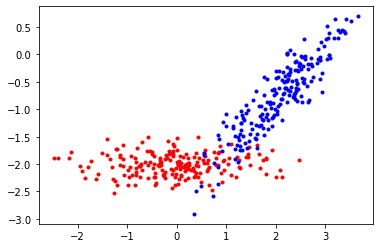

In [2]:
# Training and testing set sizes
n1 = 200 # Train
n2 = 50  # Test

# Random ellipse 1 centered at (1, -2)
x = np.random.randn(n1 + n2)
y = 0.2 * np.random.randn(n1 + n2) -2

# Random ellipse 2 centered at (1,-2)
x2 = np.random.randn(n1+n2) + 1
y2 = 0.2*np.random.randn(n1+n2) - 2

# Rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2, 2))
A[0, 0] = np.cos(theta)
A[0, 1] = -np.sin(theta)
A[1, 0] = np.sin(theta)
A[1, 1] = np.cos(theta)

x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

# Plot the data points
plt.figure()
plt.plot(x[:n1],y[:n1],'r.')
plt.plot(x3[:n1],y3[:n1],'b.')
plt.show()

In [3]:
# Training set: first 200 of 240 points
X1 = np.column_stack((x3[:n1],y3[:n1]))
X2 = np.column_stack((x[:n1],y[:n1]))

Y = np.concatenate((X1,X2))
Z = np.column_stack((np.ones(n1),2*np.ones(n1)))

# Test set: remaining 40 points
x1test = np.column_stack((x3[n1:],y3[n1:]))
x2test = np.column_stack((x[n1:],y[n1:]))

##### k-mean clustering on the dataset

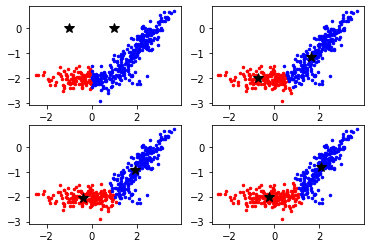

In [4]:
g1 = np.array([-1, 0]) # Initial guess
g2 = np.array([1, 0])
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

for j in range(4):
    class1 = np.zeros((1,2))
    class2 = np.zeros((1,2))
    for jj in range(Y.shape[0]):
        d1 = np.linalg.norm(g1-Y[jj,:],ord=2)
        d2 = np.linalg.norm(g2-Y[jj,:],ord=2)
        if d1<d2:
            class1 = np.append(class1,Y[jj,:].reshape((1,2)),axis=0)
        else:
            class2 = np.append(class2,Y[jj,:].reshape((1,2)),axis=0)
    class1 = np.delete(class1, (0), axis=0) # remove zeros used to initialize
    class2 = np.delete(class2, (0), axis=0)
    
    axs[j].plot(class1[:,0],class1[:,1],'r.',ms=5)
    axs[j].plot(class2[:,0],class2[:,1],'b.',ms=5)
    axs[j].plot(g1[0],g1[1],'k*',ms=10)
    axs[j].plot(g2[0],g2[1],'k*',ms=10)
    
    g1 = np.array([np.mean(class1[:,0]),np.mean(class1[:,1])])
    g2 = np.array([np.mean(class2[:,0]),np.mean(class2[:,1])])
    
plt.show()

###Clustering on iris dataset with sklearn k-mean library

Text(0.5, 1.0, 'Data')

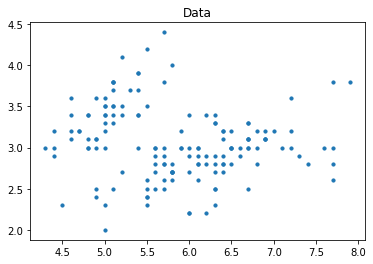

In [5]:
from sklearn import datasets
from sklearn.cluster import KMeans
iris = datasets.load_iris() #Load iris dataset
X = iris.data[:, :2]  # we only take the first two features.
y_true = iris.target  # 3 different types of irises: 'setosa', 'versicolor', 'virginica'

#Plot iris data
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('Data')


Text(0.5, 1.0, 'K-mean clustering of the data')

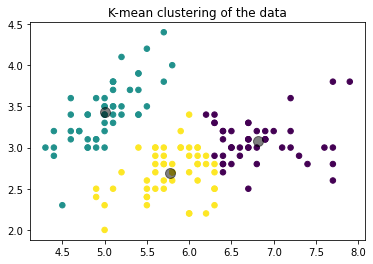

In [6]:
# K-mean clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.title('K-mean clustering of the data')